In [1]:
from google.colab import drive
drive.mount("/content/drive")
DRIVE_SRC = "/content/drive/MyDrive/IIT-Projects/third-umpire-decision-automation/backend/experiments/src"
!rm -r -f ./sample_data
!cp -r /content/drive/MyDrive/IIT-Projects/third-umpire-decision-automation/.creds/.aws ~/
!cp -r $DRIVE_SRC ./src

Mounted at /content/drive


In [2]:
! pip install -qq sagemaker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 743.3/743.3 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 14.9 MB/s eta 0:00:00


In [2]:
from sagemaker.s3 import S3Downloader
src_ds_uri = "s3://third-umpire-decision-automation-osura/datasets/object-segment-augmented-dataset/"
donwload_dir = "./data/Cricket-Semantic-Segmentation-Augmented[Splitted]"
results = S3Downloader.download(src_ds_uri,donwload_dir)
# lst = ["images", "segmentations"]
# for subdir in lst:
#     src_ds_uri = f"s3://third-umpire-decision-automation-osura/datasets/object-segment-augmented-dataset/{subdir}"
#     donwload_dir = f"./data/Cricket-Semantic-Segmentation-Augmented[Splitted]/{subdir}"
#     results = S3Downloader.download(src_ds_uri,donwload_dir)

In [21]:
# bring the dataset together
# import shutil
# import os

# data_types = ["bboxes", "images", "segmentations"]
# splits = ["train", "val"]

# for data_type in data_types:
#     for split in splits:
#         src_dir = f"{donwload_dir}/{data_type}/{split}"
#         dst_dir = f"{donwload_dir}/{data_type}"
#         files = os.listdir(src_dir)
#         for file in files:
#             src_path = f"{src_dir}/{file}"
#             dst_path = f"{dst_dir}/{file}"
#             shutil.move(src_path, dst_path)

# for data_type in data_types:
#     for split in splits:
#         src_dir = f"{donwload_dir}/{data_type}/{split}"
#         shutil.rmtree(src_dir)

In [ ]:
# TODO in the augmented dataset
# 1. Filter out the small bounding boxes
# 2. Split correctly
# 3. There are some images without segmentations

In [4]:
from src.data.generate import makeDarknetSegmentationDataset
from src.data.io import readClassesFile

src_images_root = f"{donwload_dir}/images"
src_segments_root = f"{donwload_dir}/segmentations"
src_bboxes_root = f"{donwload_dir}/bboxes"
classes_path = f"{donwload_dir}/classes/classes.json"

src_class_names = ["Batsmen", "Ball", "Wicket"]
dst_class_names = ["Batsmen"]
export_path = "./data/Batsmen-Segmentation-Augmented[Splitted]"
classes = readClassesFile(classes_path)

makeDarknetSegmentationDataset(
    src_images_root,
    src_segments_root,
    src_bboxes_root,
    src_class_names,
    dst_class_names,
    classes,
    export_path
)

  0%|          | 0/1833 [00:00<?, ?it/s]

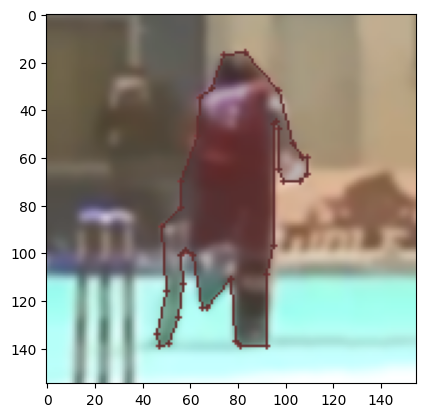

In [93]:
txt_path = "/content/data/Batsmen-Segmentation-Augmented[Splitted]/segmentations/000199.txt"
img_path = "/content/data/Batsmen-Segmentation-Augmented[Splitted]/images/000199.png"
with open(txt_path) as handler:
  txt = handler.read()
img = cv.imread(img_path)
plt.imshow(drawSegments(img, txt))

In [90]:
!ls $export_path

images	segmentations


In [ ]:
from sagemaker.s3 import S3Uploader
src_dir = export_path
dst_ds_uri = "s3://third-umpire-decision-automation-osura/datasets/batsmen-segmentation"
S3Uploader.upload(src_dir, dst_ds_uri)

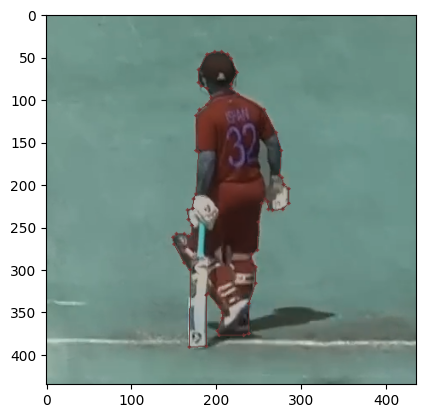

In [ ]:
cropped_img_path = "./data/Batsmen-Segmentation-Augmented[Splitted]/images/train/000000.png"
cropped_lbl_path = "./data/Batsmen-Segmentation-Augmented[Splitted]/segmentations/train/000000.txt"
crp_img = cv.imread(cropped_img_path)
txt_cntnt = ""
with open(cropped_lbl_path) as handler:
    txt_cntnt = handler.read()
drawn_img = drawSegments(crp_img, txt_cntnt)
plt.imshow(drawn_img)
plt.show()